In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 [======>.......................] - ETA: 1s - loss: 2.2505 - accuracy: 0.0781
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 1s 65ms/step - loss: 2.2240 - accuracy: 0.0701 - val_loss: 2.1284 - val_accuracy: 0.0541
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.1910 - accuracy: 0.0938
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 2.1694 - accuracy: 0.0792 - val_loss: 2.0994 - val_accuracy: 0.0743
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.1612 - accuracy: 0.0859
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 2.1403 - accuracy: 0.0792 - val_loss: 2.0741 - val_accuracy: 0.1081
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 2.0895 - accuracy: 0.1094
Epoch 4: sav

4/4 [==============================] - 0s 16ms/step - loss: 1.5639 - accuracy: 0.4253 - val_loss: 1.4762 - val_accuracy: 0.5068
Epoch 29/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5139 - accuracy: 0.4531
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 1.5490 - accuracy: 0.4163 - val_loss: 1.4533 - val_accuracy: 0.5068
Epoch 30/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.4674 - accuracy: 0.4766
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 1.5117 - accuracy: 0.4276 - val_loss: 1.4313 - val_accuracy: 0.5068
Epoch 31/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.5833 - accuracy: 0.3672
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 1.5106 - accuracy: 0.4638 - val_loss: 1.

Epoch 56/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1998 - accuracy: 0.5625
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 1.1253 - accuracy: 0.5973 - val_loss: 1.0100 - val_accuracy: 0.7162
Epoch 57/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0725 - accuracy: 0.6406
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 13ms/step - loss: 1.1089 - accuracy: 0.5995 - val_loss: 0.9974 - val_accuracy: 0.7297
Epoch 58/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0860 - accuracy: 0.6016
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 15ms/step - loss: 1.1406 - accuracy: 0.5928 - val_loss: 0.9861 - val_accuracy: 0.7365
Epoch 59/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1060 - accuracy: 0.5859
Epoch

1/4 [======>.......................] - ETA: 0s - loss: 0.8685 - accuracy: 0.7109
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.9610 - accuracy: 0.6516 - val_loss: 0.7833 - val_accuracy: 0.7905
Epoch 84/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.9098 - accuracy: 0.6719
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.9383 - accuracy: 0.6425 - val_loss: 0.7783 - val_accuracy: 0.7905
Epoch 85/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7557 - accuracy: 0.7734
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.8856 - accuracy: 0.6900 - val_loss: 0.7718 - val_accuracy: 0.7905
Epoch 86/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.9704 - accuracy: 0.6719
Epoch 86: saving mo

1/4 [======>.......................] - ETA: 0s - loss: 0.8973 - accuracy: 0.6797
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.8300 - accuracy: 0.6968 - val_loss: 0.6349 - val_accuracy: 0.8378
Epoch 111/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7688 - accuracy: 0.7266
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.7921 - accuracy: 0.7262 - val_loss: 0.6279 - val_accuracy: 0.8378
Epoch 112/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6690 - accuracy: 0.7656
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.8411 - accuracy: 0.7014 - val_loss: 0.6225 - val_accuracy: 0.8378
Epoch 113/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8810 - accuracy: 0.6875
Epoch 113: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7195 - accuracy: 0.7031
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.6939 - accuracy: 0.7376 - val_loss: 0.5181 - val_accuracy: 0.8446
Epoch 138/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7797 - accuracy: 0.7578
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.7605 - accuracy: 0.7081 - val_loss: 0.5151 - val_accuracy: 0.8446
Epoch 139/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7841 - accuracy: 0.6797
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.7313 - accuracy: 0.7262 - val_loss: 0.5130 - val_accuracy: 0.8446
Epoch 140/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7313 - accuracy: 0.7578
Epoch 140: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.6898 - accuracy: 0.7500
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.6870 - accuracy: 0.7579 - val_loss: 0.4488 - val_accuracy: 0.8581
Epoch 165/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6874 - accuracy: 0.7422
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.6914 - accuracy: 0.7285 - val_loss: 0.4473 - val_accuracy: 0.8581
Epoch 166/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6607 - accuracy: 0.7734
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.6842 - accuracy: 0.7602 - val_loss: 0.4468 - val_accuracy: 0.8514
Epoch 167/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7969
Epoch 167: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.6031 - accuracy: 0.7891
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.6604 - accuracy: 0.7557 - val_loss: 0.4018 - val_accuracy: 0.8581
Epoch 192/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7092 - accuracy: 0.7422
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.6895 - accuracy: 0.7534 - val_loss: 0.4030 - val_accuracy: 0.8581
Epoch 193/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5774 - accuracy: 0.8359
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.6282 - accuracy: 0.7919 - val_loss: 0.4018 - val_accuracy: 0.8581
Epoch 194/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6416 - accuracy: 0.7500
Epoch 194: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5562 - accuracy: 0.8281
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.6072 - accuracy: 0.7964 - val_loss: 0.3575 - val_accuracy: 0.9392
Epoch 219/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4996 - accuracy: 0.8594
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.5389 - accuracy: 0.8122 - val_loss: 0.3540 - val_accuracy: 0.9392
Epoch 220/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6700 - accuracy: 0.7734
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5637 - accuracy: 0.8100 - val_loss: 0.3514 - val_accuracy: 0.9392
Epoch 221/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4905 - accuracy: 0.8203
Epoch 221: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5920 - accuracy: 0.7734
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5587 - accuracy: 0.7896 - val_loss: 0.3461 - val_accuracy: 0.8649
Epoch 246/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6392 - accuracy: 0.7891
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.5738 - accuracy: 0.8032 - val_loss: 0.3440 - val_accuracy: 0.8716
Epoch 247/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6002 - accuracy: 0.7812
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.5995 - accuracy: 0.7896 - val_loss: 0.3414 - val_accuracy: 0.8919
Epoch 248/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5958 - accuracy: 0.8125
Epoch 248: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.6408 - accuracy: 0.7266
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.6273 - accuracy: 0.7624 - val_loss: 0.3205 - val_accuracy: 0.9459
Epoch 273/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5187 - accuracy: 0.7891
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.5377 - accuracy: 0.8077 - val_loss: 0.3184 - val_accuracy: 0.9459
Epoch 274/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6527 - accuracy: 0.7422
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5753 - accuracy: 0.7896 - val_loss: 0.3169 - val_accuracy: 0.9459
Epoch 275/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4790 - accuracy: 0.8672
Epoch 275: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.4262 - accuracy: 0.8438
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.5616 - accuracy: 0.7896 - val_loss: 0.2781 - val_accuracy: 0.9459
Epoch 300/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4252 - accuracy: 0.8359
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.5212 - accuracy: 0.8032 - val_loss: 0.2795 - val_accuracy: 0.9459
Epoch 301/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5670 - accuracy: 0.7891
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5120 - accuracy: 0.7986 - val_loss: 0.2802 - val_accuracy: 0.9459
Epoch 302/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5203 - accuracy: 0.8125
Epoch 302: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.6206 - accuracy: 0.7969
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5518 - accuracy: 0.8009 - val_loss: 0.2657 - val_accuracy: 0.9527
Epoch 327/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5122 - accuracy: 0.8203
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 23ms/step - loss: 0.4761 - accuracy: 0.8439 - val_loss: 0.2663 - val_accuracy: 0.9527
Epoch 328/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4576 - accuracy: 0.8594
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 18ms/step - loss: 0.5375 - accuracy: 0.8326 - val_loss: 0.2668 - val_accuracy: 0.9459
Epoch 329/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4556 - accuracy: 0.8516
Epoch 329: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.5367 - accuracy: 0.8516
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.4776 - accuracy: 0.8462 - val_loss: 0.2578 - val_accuracy: 0.9527
Epoch 354/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5556 - accuracy: 0.8047
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.4949 - accuracy: 0.8258 - val_loss: 0.2554 - val_accuracy: 0.9527
Epoch 355/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5135 - accuracy: 0.8359
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.4884 - accuracy: 0.8326 - val_loss: 0.2537 - val_accuracy: 0.9527
Epoch 356/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6371 - accuracy: 0.7969
Epoch 356: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.4114 - accuracy: 0.8750
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5119 - accuracy: 0.8235 - val_loss: 0.2447 - val_accuracy: 0.9527
Epoch 381/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5130 - accuracy: 0.8203
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.4744 - accuracy: 0.8394 - val_loss: 0.2468 - val_accuracy: 0.9527
Epoch 382/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5643 - accuracy: 0.7578
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.5182 - accuracy: 0.8145 - val_loss: 0.2489 - val_accuracy: 0.9527
Epoch 383/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4514 - accuracy: 0.8203
Epoch 383: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.4787 - accuracy: 0.8203
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.5263 - accuracy: 0.8100 - val_loss: 0.2281 - val_accuracy: 0.9662
Epoch 408/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5528 - accuracy: 0.7578
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 16ms/step - loss: 0.4627 - accuracy: 0.8258 - val_loss: 0.2310 - val_accuracy: 0.9730
Epoch 409/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4992 - accuracy: 0.8125
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.4200 - accuracy: 0.8462 - val_loss: 0.2325 - val_accuracy: 0.9730
Epoch 410/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.4663 - accuracy: 0.8125
Epoch 410: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.4820 - accuracy: 0.8516
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.4449 - accuracy: 0.8575 - val_loss: 0.2263 - val_accuracy: 0.9797
Epoch 435/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.3958 - accuracy: 0.8516
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
4/4 [==============================] - 0s 19ms/step - loss: 0.4444 - accuracy: 0.8439 - val_loss: 0.2260 - val_accuracy: 0.9797
Epoch 435: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 8ms/step - loss: 0.2260 - accuracy: 0.9797


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 80ms/step
[9.6973922e-14 1.0174060e-07 1.4991307e-06 2.1871009e-13 3.8794794e-09
 9.9999833e-01 4.9049371e-12 1.7290175e-13]
5


# Confusion matrix

5/5 [==============================] - 0s 1ms/step


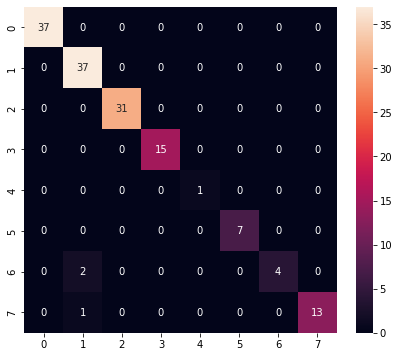

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.96        37
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         7
           6       1.00      0.67      0.80         6
           7       1.00      0.93      0.96        14

    accuracy                           0.98       148
   macro avg       0.99      0.95      0.97       148
weighted avg       0.98      0.98      0.98       148



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\marti\AppData\Local\Temp\tmpg51xxm5j\assets


6664

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6973550e-14 1.0174059e-07 1.4991321e-06 2.1871009e-13 3.8794714e-09
 9.9999833e-01 4.9049280e-12 1.7290111e-13]
5
